In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("DB/Git_Data(range(1~10,000)).csv")

In [2]:
df.head

<bound method NDFrame.head of          Num  User_ID User_Name            Repository_Name  \
0          1        1   mojombo  30daysoflaptops.github.io   
1          2        1   mojombo                  asteroids   
2          3        1   mojombo       benbalter.github.com   
3          4        1   mojombo                       bert   
4          5        1   mojombo                   bert.erl   
...      ...      ...       ...                        ...   
60673  74370     9995     gecka                   uwsgitop   
60674  74372     9999     yohei                  couchrest   
60675  74374     9999     yohei            merb-pagination   
60676  74376     9999     yohei               test-project   
60677  74377     9999     yohei            yohei.github.io   

                 created_at            updated_at             pushed_at  CSS  \
0      2014-11-20T06:42:06Z  2021-04-03T10:15:42Z  2014-11-20T06:42:47Z    1   
1      2014-03-03T07:40:00Z  2022-03-31T18:12:41Z  2015-03-10T18:

In [3]:
df['date'] = df['created_at']
df['year'] = df['created_at']
df['date'] = df.created_at.str[0:10] # 날짜 부분 추출
df['year'] = df.created_at.str[0:4]

df['date'] = pd.to_datetime(df.date)
dt = df.sort_values(by='date')

df.year


0        2014
1        2014
2        2015
3        2009
4        2009
         ... 
60673    2014
60674    2009
60675    2009
60676    2009
60677    2014
Name: year, Length: 60678, dtype: object

In [4]:
dt = dt.drop(['created_at'], axis=1)
dt = dt.drop(['updated_at'], axis=1)
dt = dt.drop(['pushed_at'], axis=1)


dt.head

<bound method NDFrame.head of          Num  User_ID   User_Name       Repository_Name  CSS  JavaScript  \
8616   10529     1023     cobrien             merb-core    0           1   
13021  15890     1676  fightinjoe                   god    0           1   
7745    9496      907   lukaszcho         attachment_fu    0           0   
13018  15887     1676  fightinjoe      exception_logger    0           1   
1181    1446      154  nicksieger         attachment_fu    0           0   
...      ...      ...         ...                   ...  ...         ...   
9529   11633     1128        coty  docker-appium-opencv    0           0   
47126  57711     7306      somazx        boardgames-app    1           1   
34197  41883     5044     shanebo                 govna    0           1   
45163  55323     6916        pirj             discourse    1           1   
47598  58297     7394  ballantyne          kepa-de-mimi    0           1   

       CoffeeScript  Shell  Ruby  Perl  ...  Modelica  Sm

In [5]:
value = dt.sum()
value = value.drop("User_Name")
value = value.drop("Repository_Name")
value = value.drop("year")
sort_val = value.sort_values(ascending = False)
sort_val = sort_val.drop("Num")
sort_val = sort_val.drop("User_ID")

List_Lang = sort_val.index
List_Lang = List_Lang.to_list()

In [6]:
def list_Chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

list_Chunked = list_Chunk(List_Lang, 10);

In [7]:
list_Chunked
List_top10 = list_Chunked[0]
List_top10

dt[List_top10]

,Ruby,JavaScript,Shell,HTML,CSS,Python,Makefile,Go,Java,CoffeeScript
8616,1,1,0,0,0,0,0,0,0,0
13021,1,1,0,0,0,0,0,0,0,0
7745,1,0,0,0,0,0,0,0,0,0
13018,1,1,0,0,0,0,0,0,0,0
1181,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9529,0,0,0,0,0,0,0,0,0,0
47126,1,1,0,1,1,0,0,0,0,0
34197,0,1,0,0,0,0,0,0,0,0
45163,1,1,1,1,1,0,0,0,0,0


In [8]:
grouped = dt[List_top10].groupby(dt['year']).sum()
grouped

,Ruby,JavaScript,Shell,HTML,CSS,Python,Makefile,Go,Java,CoffeeScript
year,,,,,,,,,,
2008,2211,846,210,71,74,208,17,2,75,5
2009,2621,1061,285,101,100,289,13,3,108,5
2010,2351,1145,286,80,83,312,19,3,128,46
2011,2400,1361,471,119,139,395,16,15,153,225
2012,2380,1503,621,147,207,395,32,55,167,390
2013,2296,1733,874,201,793,488,50,140,216,426
2014,1646,1523,800,307,1317,405,88,189,168,365
2015,1805,2071,1196,1814,1534,592,434,325,305,372
2016,1387,1777,1135,1773,1255,516,358,268,239,228


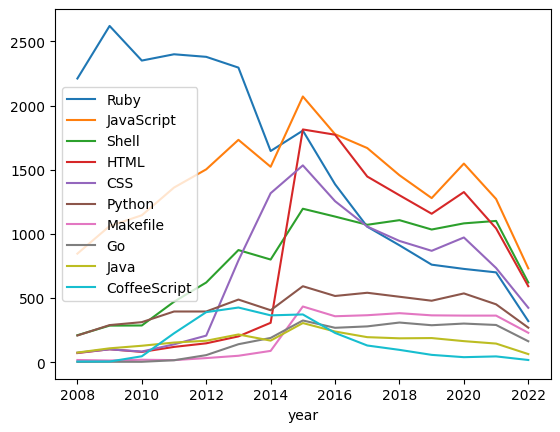

In [9]:
ax = grouped.plot(kind='line')